In [1]:
import os
os.chdir('..')
print(os.getcwd())

C:\Users\Admin\Desktop\Git\PAMBuH


In [2]:
import pandas as pd
import json
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load

In [3]:
train = pd.read_csv('data/train.csv')
hubmap = pd.read_csv('data/HuBMAP-20-dataset_information.csv')

In [4]:
print(train.shape)
train.head(n=3)

(8, 2)


,id,encoding
0,2f6ecfcdf,296084587 4 296115835 6 296115859 14 296147109...
1,aaa6a05cc,30989109 59 31007591 64 31026074 68 31044556 7...
2,cb2d976f4,78144363 5 78179297 15 78214231 25 78249165 35...


In [5]:
print(hubmap.shape)
hubmap.head(n=3)

(13, 16)


,image_file,width_pixels,height_pixels,anatomical_structures_segmention_file,glomerulus_segmentation_file,patient_number,race,ethnicity,sex,age,weight_kilograms,height_centimeters,bmi_kg/m^2,laterality,percent_cortex,percent_medulla
0,afa5e8098.tiff,43780,36800,afa5e8098-anatomical-structure.json,afa5e8098.json,67347,White,Not Hispanic or Latino,Female,58,59.0,160.0,23.0,Right,55,45
1,54f2eec69.tiff,22240,30440,54f2eec69-anatomical-structure.json,54f2eec69.json,67548,Black or African American,Not Hispanic or Latino,Male,58,79.9,190.5,22.0,Right,75,25
2,1e2425f28.tiff,32220,26780,1e2425f28-anatomical-structure.json,1e2425f28.json,63921,White,Not Hispanic or Latino,Male,48,131.5,193.0,35.3,Right,65,35


## Visualization of train data

In [6]:
hubmap['id'] = hubmap['image_file'].str.replace('.tiff', '')
train_hubmap = hubmap[hubmap['id'].isin(train['id'].to_list())].reset_index(drop=True)
train_hubmap.head(n=8)

,image_file,width_pixels,height_pixels,anatomical_structures_segmention_file,glomerulus_segmentation_file,patient_number,race,ethnicity,sex,age,weight_kilograms,height_centimeters,bmi_kg/m^2,laterality,percent_cortex,percent_medulla,id
0,54f2eec69.tiff,22240,30440,54f2eec69-anatomical-structure.json,54f2eec69.json,67548,Black or African American,Not Hispanic or Latino,Male,58,79.9,190.5,22.0,Right,75,25,54f2eec69
1,1e2425f28.tiff,32220,26780,1e2425f28-anatomical-structure.json,1e2425f28.json,63921,White,Not Hispanic or Latino,Male,48,131.5,193.0,35.3,Right,65,35,1e2425f28
2,e79de561c.tiff,27020,16180,e79de561c-anatomical-structure.json,e79de561c.json,67026,Black or African American,Not Hispanic or Latino,Male,53,73.0,166.0,26.5,Left,55,45,e79de561c
3,095bf7a1f.tiff,39000,38160,095bf7a1f-anatomical-structure.json,095bf7a1f.json,68250,White,Not Hispanic or Latino,Female,44,71.7,160.0,28.0,Right,65,35,095bf7a1f
4,aaa6a05cc.tiff,13013,18484,aaa6a05cc-anatomical-structure.json,aaa6a05cc.json,65631,White,Not Hispanic or Latino,Female,73,NaN,NaN,NaN,Left,75,25,aaa6a05cc
5,cb2d976f4.tiff,49548,34940,cb2d976f4-anatomical-structure.json,cb2d976f4.json,67548,Black or African American,Not Hispanic or Latino,Male,58,79.9,190.5,22.0,Right,75,25,cb2d976f4
6,0486052bb.tiff,34937,25784,0486052bb-anatomical-structure.json,0486052bb.json,67177,White,Not Hispanic or Latino,Male,31,106.1,180.3,32.6,Right,80,20,0486052bb
7,2f6ecfcdf.tiff,25794,31278,2f6ecfcdf-anatomical-structure.json,2f6ecfcdf.json,68555,White,Not Hispanic or Latino,Female,76,93.0,157.4,37.5,Left,80,20,2f6ecfcdf


In [84]:
train_imgs = train_hubmap['id'].to_list()

markups = []
for img in train_imgs:
    json_path = 'data/markup/'
    with open(f'{json_path}{img}.json') as json_file:
        markup = json.load(json_file)
    markups.append(markup)
    
anot_structures = []
for img in train_imgs:
    json_path = 'data/markup/'
    with open(f'{json_path}{img}-anatomical-structure.json') as json_file:
        anot_structure = json.load(json_file)
    anot_structures.append(anot_structure)
    
train_widths = train_hubmap['width_pixels'].to_list()
train_heights = train_hubmap['height_pixels'].to_list()

### 1) Glomerulus_segmentation_file

#### Uniqueness

In [8]:
types = [glom['type'] for markup in markups for glom in markup]
print(f'Unique features: {list(np.unique(types))}')

ids = [glom['id']  for markup in markups for glom in markup]
print(f'Unique ids: {list(np.unique(ids))}')   

gem_types = [glom['geometry']['type']  for markup in markups for glom in markup]
print(f"Unique geometry types: {list(np.unique(gem_types))}")

prop_names = [glom['properties']['classification']['name']  for markup in markups for glom in markup]
print(f"Unique property names: {list(np.unique(prop_names))}")

prop_islocked = [glom['properties']['isLocked']  for markup in markups for glom in markup]
print(f"Unique isLocked values: {list(np.unique(prop_islocked))}")

rgb = [glom['properties']['classification']['colorRGB']  for markup in markups for glom in markup]
print(f"Unique RGB colours: {list(np.unique(rgb))}")

Unique features: ['Feature']
Unique ids: ['PathAnnotationObject', 'PathDetectionObject']
Unique geometry types: ['Polygon']
Unique property names: ['glomerulus']
Unique isLocked values: [False, True]
Unique RGB colours: [-3140401]


In [9]:
unique, counts = np.unique(ids, return_counts=True)
print('Ids distribution:  {}'.format({val: count for val, count in zip(unique, counts)}))

unique, counts = np.unique(prop_islocked, return_counts=True)
print('Islocked distribution:  {}'.format({val: count for val, count in zip(unique, counts)}))

Ids distribution:  {'PathAnnotationObject': 709, 'PathDetectionObject': 876}
Islocked distribution:  {False: 876, True: 709}


In [11]:
img_anot = np.unique([img for markup, img in zip(markups, train_imgs) for glom in markup if glom['id'] == 'PathAnnotationObject'])
print(f"Imgs with PathAnnotationObject id: {list(img_anot)}")

img_det = np.unique([img for markup, img in zip(markups, train_imgs) for glom in markup if glom['id'] == 'PathDetectionObject'])
print(f"Imgs with PathDetectionObject id: {list(img_det)}")

Imgs with PathAnnotationObject id: ['0486052bb', '2f6ecfcdf', 'aaa6a05cc', 'cb2d976f4']
Imgs with PathDetectionObject id: ['095bf7a1f', '1e2425f28', '54f2eec69', 'e79de561c']


#### 2D histogram

In [12]:
def plot_hist(x: list, y: list=None, subtitles: list=None, bins: int=25, title: str="" ,hist_type='2D',
             x_label: str=None, y_label: str=None):
    """Plot 1D or 2d hist with 4 cols.
    """
    
    if subtitles is None:
        subtitles = [''] * len(x)
    length = len(x)
    num_rows = length // 4
    plt.rcParams['figure.figsize'] = [20, 8]
    fig, ax = plt.subplots(num_rows, 4)
    if hist_type == '2D':
        [ax[i//4, i%4].hist2d(x[i], y[i], bins=bins) for i in range(length)]
        [ax[i//4, i%4].set_xlim([0.0, 1.0]) for i in range(length)]
        [ax[i//4, i%4].set_ylim([0.0, 1.0]) for i in range(length)]
    else:
        [ax[i//4, i%4].hist(x[i], bins=bins) for i in range(length)]
    [ax[i//4, i%4].set_title(subtitles[i], fontsize=16) for i in range(length)]
    fig.text(0.5, 0.04, x_label, ha='center' ,fontsize=24)
    fig.text(0.08, 0.5, y_label, va='center', rotation='vertical', fontsize=24)
    fig.suptitle(title, fontsize=24)
    
def flatten_list(list_of_list: list):
    """Flatten list of list to list.
    """
    return [subsublist for sublist in list_of_list for subsublist in sublist]
    

x - width<br>
y - height

In [13]:
x = [[x_sample/width for glom in markup for x_sample, y_sample in glom['geometry']['coordinates'][0]] 
     for width, markup in zip(train_widths, markups)]
y = [[y_sample/height for glom in markup for x_sample, y_sample in glom['geometry']['coordinates'][0]] 
     for height, markup in zip(train_heights, markups)]

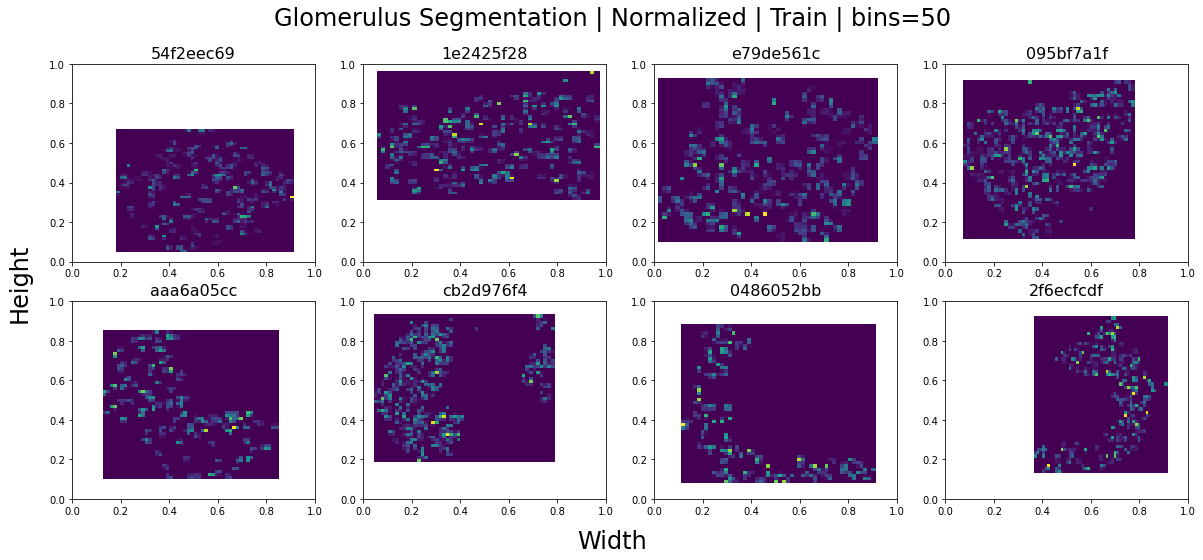

In [57]:
###########
bins = 50
###########
plot_hist(x, y, train_imgs, bins=bins, title=f'Glomerulus Segmentation | Normalized | Train | bins={bins}',
         x_label='Width', y_label='Height')

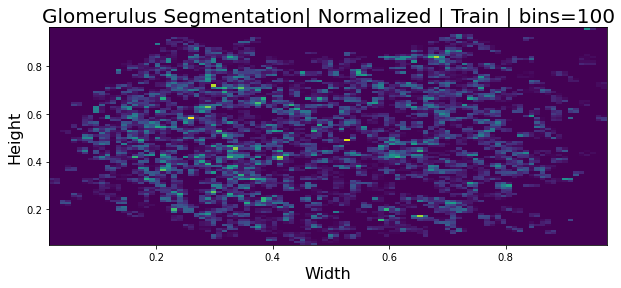

In [49]:
###########
bins = 100
###########
plt.rcParams['figure.figsize'] = [10, 4]
plt.title(f'Glomerulus Segmentation| Normalized | Train | bins={bins}', fontsize=20)
plt.hist2d(flatten_list(x), flatten_list(y), bins=bins)
plt.xlabel('Width', fontsize=16)
plt.ylabel('Height', fontsize=16); plt.show()

#### Number of Edges

In [17]:
glom_len = [[len(coords) for glom in markup for coords in glom['geometry']['coordinates']] 
     for markup in markups]

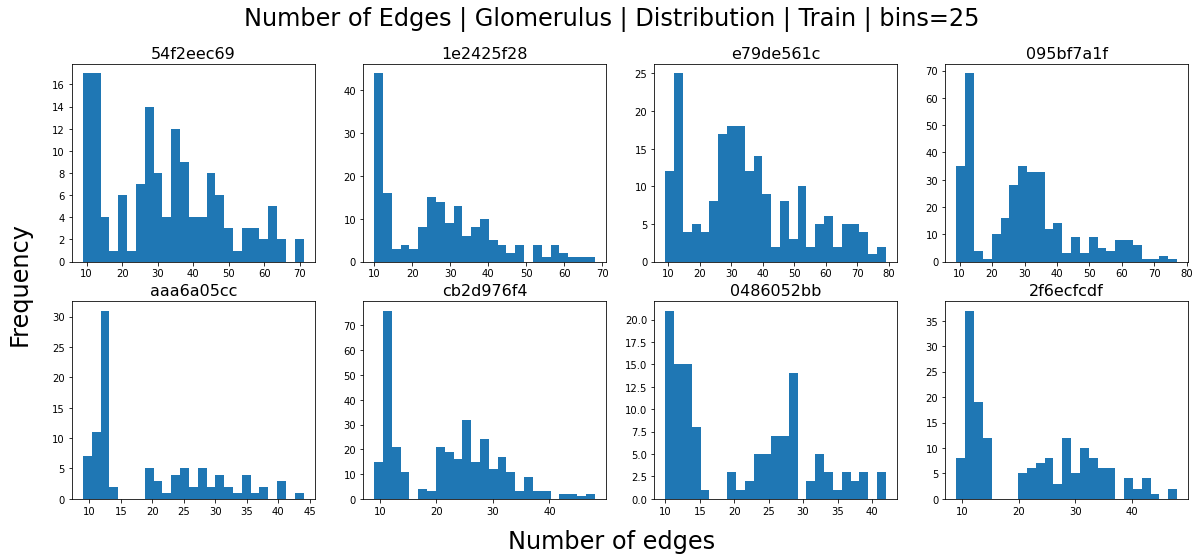

In [18]:
###########
bins = 25
###########
plot_hist(glom_len, subtitles=train_imgs, bins=bins, title=f'Number of Edges | Glomerulus | Distribution | Train | bins={bins}', 
          hist_type='1D', x_label='Number of edges', y_label='Frequency')

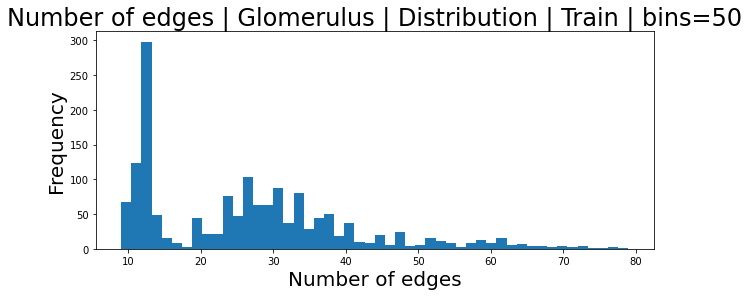

In [48]:
###########
bins = 50
###########
plt.rcParams['figure.figsize'] = [10, 4]
plt.title(f'Number of edges | Glomerulus | Distribution | Train | bins={bins}', fontsize=24)
plt.hist(flatten_list(glom_len), bins=bins)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Number of edges", fontsize=20); plt.show()

#### Area

Assumption: glomerulus has shape of elips<br>
Area: Pi*x_radius*y_radius

In [20]:
def get_diff_x(coords):
    return list(np.max(coords, axis=0)-np.min(coords, axis=0))[0]
def get_diff_y(coords):
    return list(np.max(coords, axis=0)-np.min(coords, axis=0))[1]

In [27]:
glom_max_x_diff = [[get_diff_x(coords)/width for glom in markup for coords in glom['geometry']['coordinates']] 
     for width, markup in zip(train_widths, markups)]
glom_max_y_diff = [[get_diff_y(coords)/height for glom in markup for coords in glom['geometry']['coordinates']] 
     for height, markup in zip(train_heights, markups)]
glom_area = [[round(np.pi*x*y*100/4, 3) for x, y in zip( x_img, y_img)] for x_img, y_img in zip(glom_max_x_diff, glom_max_y_diff)] 

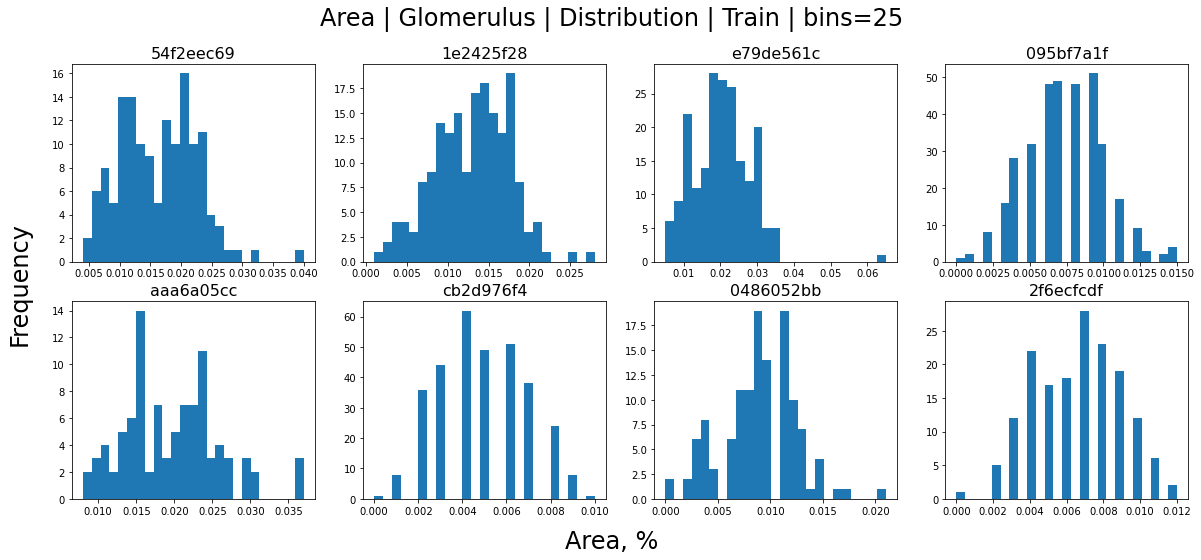

In [28]:
###########
bins = 25
###########
plot_hist(glom_area, subtitles=train_imgs, bins=bins, title=f'Area | Glomerulus | Distribution | Train | bins={bins}', 
          hist_type='1D', x_label='Area, %', y_label='Frequency')

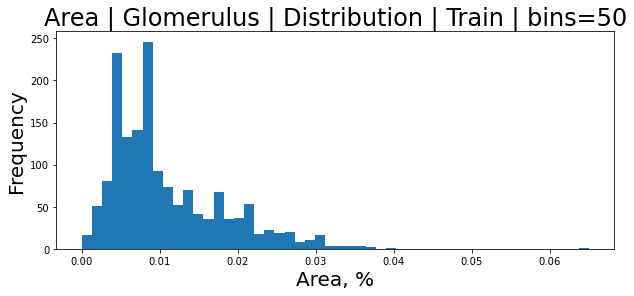

In [33]:
###########
bins = 50
###########
total_area = np.sum(flatten_list(glom_area))/len(glom_area)
plt.rcParams['figure.figsize'] = [10, 4]
plt.title(f'Area | Glomerulus | Distribution | Train | bins={bins}', fontsize=24)
plt.hist(flatten_list(glom_area), bins=bins)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Area, %", fontsize=20); plt.show()

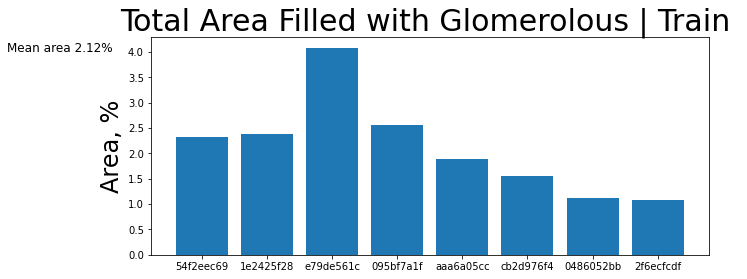

In [38]:
plt.title("Total Area Filled with Glomerolous | Train ", fontsize=30)
total_areas = [np.sum(glom) for glom in glom_area]
plt.bar(train_imgs, total_areas)
plt.ylabel("Area, %", fontsize=24)
plt.text(-3, int(np.max(total_areas)), f"Mean area {round(np.mean(total_areas), 2)}%", fontsize=12);

### Form

In [90]:
xy_max = [[np.max(glom['geometry']['coordinates'][0], axis=0) for glom in markup] for markup in markups]
xy_min = [[np.min(glom['geometry']['coordinates'][0], axis=0) for glom in markup] for markup in markups]

In [143]:
markups_copy = copy.deepcopy(markups)
for i in range(len(markups_copy)):
    for j in range(len(markups_copy[i])):
        for k in range(len(markups_copy[i][j]['geometry']['coordinates'][0])):
            diff_x = xy_max[i][j][0] - xy_min[i][j][0]
            diff_y = xy_max[i][j][1] - xy_min[i][j][1]
            markups_copy[i][j]['geometry']['coordinates'][0][k][0] = (markups_copy[i][j]['geometry']['coordinates'][0][k][0]-xy_min[i][j][0]) / diff_x
            markups_copy[i][j]['geometry']['coordinates'][0][k][1] = (markups_copy[i][j]['geometry']['coordinates'][0][k][1]-xy_min[i][j][1]) / diff_y

In [148]:
x = [[x_sample for glom in markup for x_sample, y_sample in glom['geometry']['coordinates'][0]] 
     for markup in markups_copy]
y = [[y_sample for glom in markup for x_sample, y_sample in glom['geometry']['coordinates'][0]] 
     for markup in markups_copy]

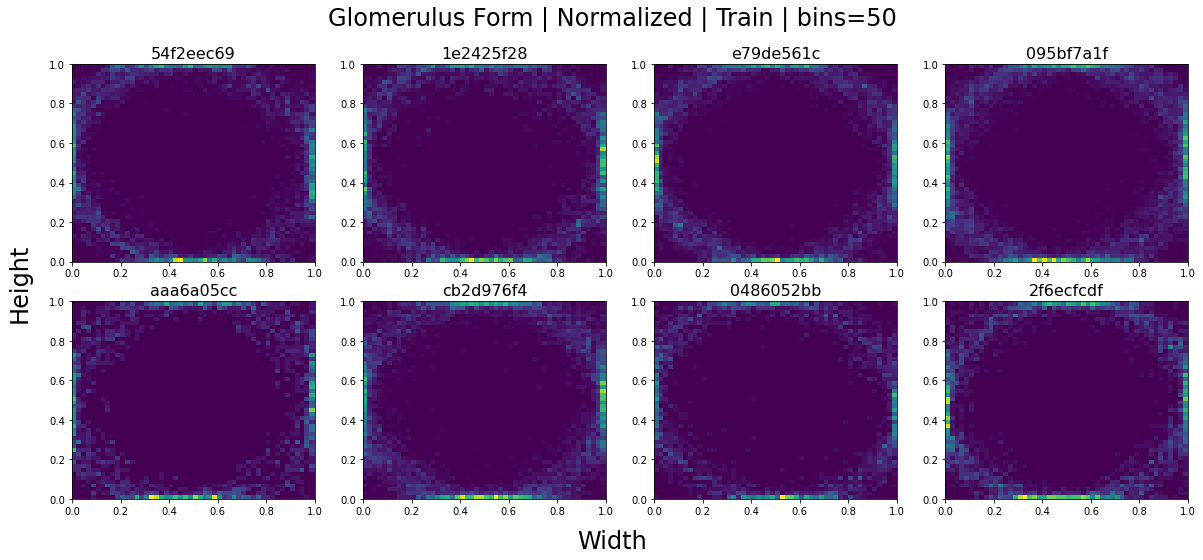

In [154]:
###########
bins = 50
###########
plot_hist(x, y, train_imgs, bins=bins, title=f'Glomerulus Form | Normalized | Train | bins={bins}',
         x_label='Width', y_label='Height')

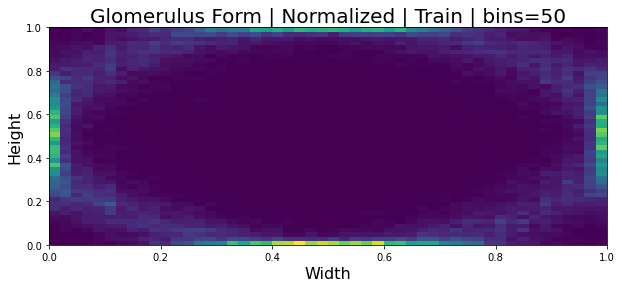

In [155]:
###########
bins = 50
###########
plt.rcParams['figure.figsize'] = [10, 4]
plt.title(f'Glomerulus Form | Normalized | Train | bins={bins}', fontsize=20)
plt.hist2d(flatten_list(x), flatten_list(y), bins=bins)
plt.xlabel('Width', fontsize=16)
plt.ylabel('Height', fontsize=16); plt.show()

### 2) anatomical_structures_segmention_file

#### Uniqueness

In [39]:
types = [struct['type'] for anot_structure in anot_structures for struct in anot_structure]
print(f'Unique features: {list(np.unique(types))}')

ids = [struct['id'] for anot_structure in anot_structures for struct in anot_structure]
print(f'Unique ids: {list(np.unique(ids))}')

gem_types = [struct['geometry']['type'] for anot_structure in anot_structures for struct in anot_structure]
print(f'Unique geometry types: {list(np.unique(gem_types))}')


prop_names = [struct['properties']['classification']['name'] for anot_structure in anot_structures for struct in anot_structure]
print(f'Unique property names: {list(np.unique(prop_names))}')

prop_islocked = [struct['properties']['isLocked'] for anot_structure in anot_structures for struct in anot_structure]
print(f'Unique isLocked values: {list(np.unique(prop_islocked))}')

rgb = [struct['properties']['classification']['colorRGB'] for anot_structure in anot_structures for struct in anot_structure]
print(f'Unique RGB colours: {list(np.unique(rgb))}')

Unique features: ['Feature']
Unique ids: ['PathAnnotationObject']
Unique geometry types: ['MultiPolygon', 'Polygon']
Unique property names: ['Cortex', 'Medulla']
Unique isLocked values: [False]
Unique RGB colours: [-1091353, -65536]


In [40]:
unique, counts = np.unique(gem_types, return_counts=True)
print('Geometry types distribution:  {}'.format({val: count for val, count in zip(unique, counts)}))

unique, counts = np.unique(prop_names, return_counts=True)
print('Property names distribution:  {}'.format({val: count for val, count in zip(unique, counts)}))

unique, counts = np.unique(rgb, return_counts=True)
print('RGB distribution:  {}'.format({val: count for val, count in zip(unique, counts)}))

Geometry types distribution:  {'MultiPolygon': 1, 'Polygon': 14}
Property names distribution:  {'Cortex': 9, 'Medulla': 6}
RGB distribution:  {-1091353: 9, -65536: 6}


In [41]:
print("Example of multipolygon")
multi_pol = [struct['geometry']['coordinates'] for anot_structure in anot_structures for struct in anot_structure
            if struct['geometry']['type'] == 'MultiPolygon']
[print(f"Polygon: {subpol}\n") for pol in multi_pol[0] for subpol in pol];

Example of multipolygon
Polygon: [[5987, 1052], [5651, 1244], [5627, 1244], [4497, 3191], [3776, 4105], [2791, 5523], [2190, 6292], [2190, 6316], [1060, 7349], [1036, 7349], [1036, 7398], [1036, 7422], [1036, 7494], [1036, 8431], [1036, 8455], [1036, 8479], [1204, 12181], [1853, 14344], [1853, 14368], [1877, 14368], [2730, 16683], [2783, 16683], [3955, 16417], [4008, 16417], [5980, 15671], [6324, 14535], [6564.28, 12639.67], [6084, 11083], [6052, 10649], [6088, 9902], [6305, 9219], [6696, 8829], [7424, 8042], [7623, 7920], [7837, 7996], [8343, 8311], [9473, 8071], [10314, 7830], [10338, 7830], [10843, 7494], [11299, 6244], [11107, 5162], [10602, 3984], [10602, 3960], [9833, 2975], [9809, 2927], [9761, 2879], [9689, 2855], [8728, 2109], [8704, 1677], [8728, 1653], [8800, 1388], [8343, 1244], [7694, 1124], [7718, 1461], [6877, 1533], [6853, 1533], [6324, 1172], [5987, 1052]]

Polygon: [[6564.28, 12639.67], [6565, 12642], [6565, 12634], [6564.28, 12639.67]]



#### 2D histogram

In [42]:
def convert_multi_into_plain(coords: list):
    print(coords)
    list_coord = []
    for coord in coords:
        list_coord.append(np.array(coord[0]))
    return np.concatenate(list_coord, axis=0).tolist()

Flatten multi polygon into plain polygon

In [43]:
%%capture
for i in range(len(anot_structures)):
    for j in range(len(anot_structures[i])):
        if anot_structures[i][j]['geometry']['type'] == 'MultiPolygon':
            anot_structures[i][j]['geometry']['coordinates'] = [convert_multi_into_plain(anot_structures[i][j]['geometry']['coordinates'])] 

In [44]:
x_anom = [[x_sample/width for struct in anot_structure for x_sample, y_sample in struct['geometry']['coordinates'][0]] 
           for width, anot_structure in zip(train_widths, anot_structures)]
y_anom = [[y_sample/height for struct in anot_structure for x_sample, y_sample in struct['geometry']['coordinates'][0]] 
          for height, anot_structure in zip(train_heights, anot_structures)]

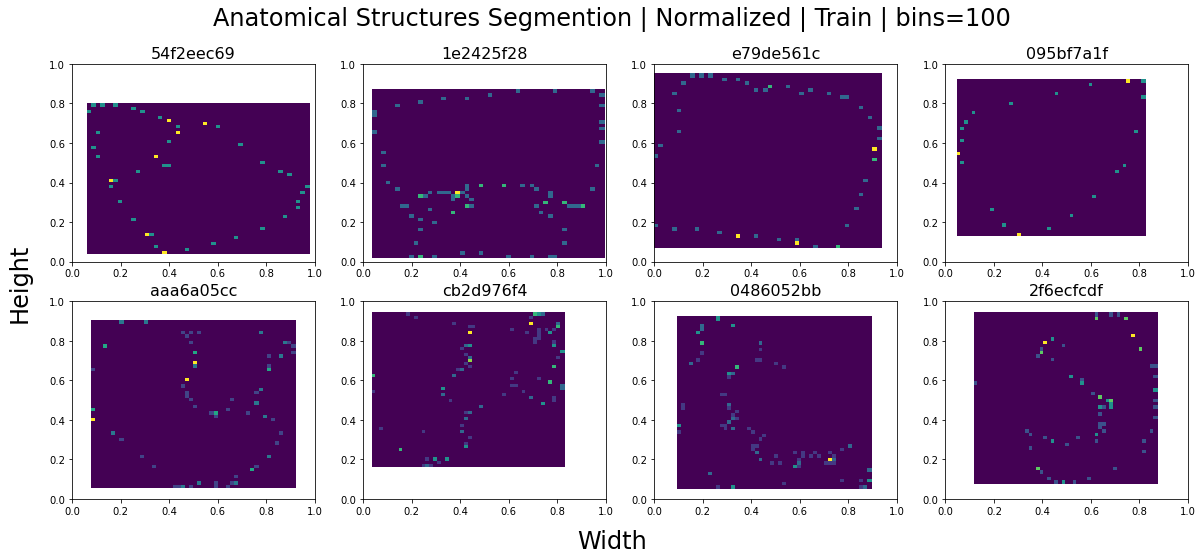

In [58]:
###########
bins = 50
###########
plot_hist(x_anom, y_anom, train_imgs, bins=bins, title='Anatomical Structures Segmention | Normalized | Train | bins=100',
         x_label='Width', y_label='Height')

#### Area

In [52]:
an_max_x_diff = [[get_diff_x(coords)/width for struct in anot_structure for coords in struct['geometry']['coordinates']] 
     for width, anot_structure in zip(train_widths, anot_structures)]
an_max_y_diff = [[get_diff_y(coords)/height for struct in anot_structure for coords in struct['geometry']['coordinates']] 
     for height, anot_structure in zip(train_heights, anot_structures)]
an_area = [[100*np.pi*x*y/4 for x, y in zip( x_img, y_img)] for x_img, y_img in zip(an_max_x_diff, an_max_y_diff)] 

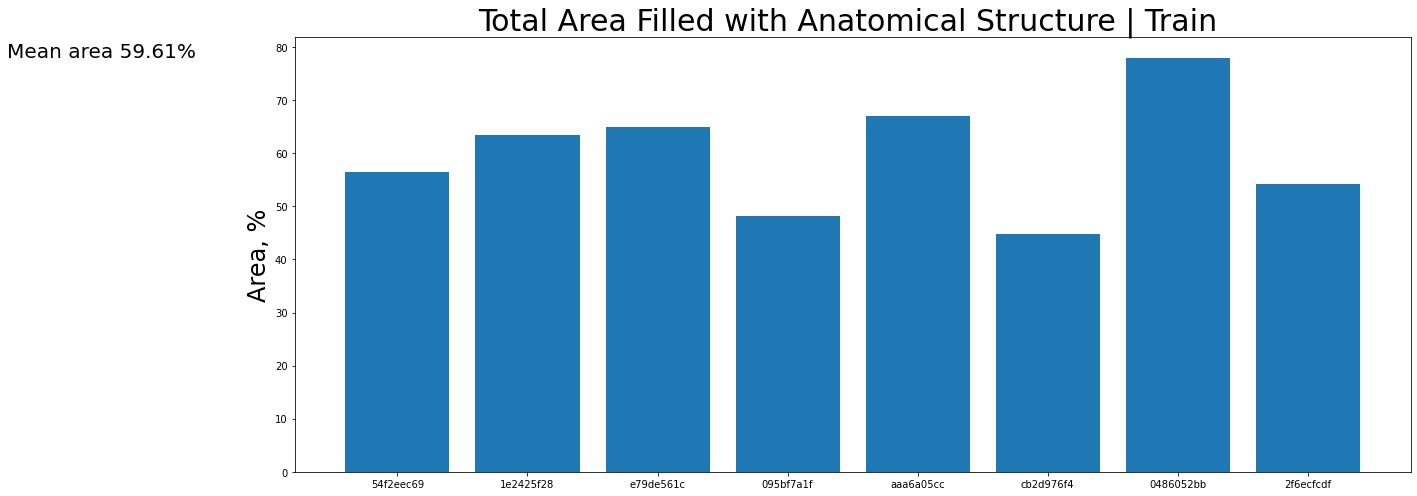

In [56]:
plt.title("Total Area Filled with Anatomical Structure | Train ", fontsize=30)
total_areas = [np.sum(an) for an in an_area]
plt.bar(train_imgs, total_areas)
plt.ylabel("Area, %", fontsize=24)
plt.text(-3, int(np.max(total_areas)), f"Mean area {round(np.mean(total_areas), 2)}%", fontsize=20);